<a href="https://colab.research.google.com/github/manoharpavuluri/dl-cnn-flowerclassification/blob/main/dl_cnn_flowerclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL # if you want to see image
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [11]:
# below we will use get_file function which takes following arguemens. flower_photos is the directory where the photos will be stored. cache_dir,
#     is where flower_photos needs to be stored, '.' specifying same directory as where this python file is.
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, cache_dir='.', untar=True)

In [12]:
data_dir

'./datasets/flower_photos'

In [14]:
# lets see if it has jpg files
list(data_dir.glob('*/*.jpg'))

AttributeError: 'str' object has no attribute 'glob'

In [15]:
# in order to see and play with the files in the directory, we need to import pathlib library
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [25]:
from prettytable import PrettyTable

def get_folder_extension_counts(directory):
    folder_extension_counts = {}

    for root, dirs, files in os.walk(directory):
        folder_name = os.path.basename(root)
        folder_extension_counts[folder_name] = {'extensions': set(), 'counts': {}}

        for file in files:
            _, extension = os.path.splitext(file)
            extension = extension.lower()  # Convert to lowercase for case-insensitive comparison

            # Update the counts and extensions for the current folder
            folder_extension_counts[folder_name]['extensions'].add(extension)
            folder_extension_counts[folder_name]['counts'][extension] = folder_extension_counts[folder_name]['counts'].get(extension, 0) + 1

    return folder_extension_counts

def display_table(folder_extension_counts):
    table = PrettyTable()
    table.field_names = ["Subfolder Name", "Extension", "Count of Files"]

    for folder, data in folder_extension_counts.items():
        for extension, count in data['counts'].items():
            table.add_row([folder, extension, count])

    print(table)

# Example usage:
directory_path = 'datasets/flower_photos'
folder_extension_counts = get_folder_extension_counts(directory_path)

display_table(folder_extension_counts)


+----------------+-----------+----------------+
| Subfolder Name | Extension | Count of Files |
+----------------+-----------+----------------+
| flower_photos  |    .txt   |       1        |
|     tulips     |    .jpg   |      799       |
|   dandelion    |    .jpg   |      898       |
|     roses      |    .jpg   |      641       |
|     daisy      |    .jpg   |      633       |
|   sunflowers   |    .jpg   |      699       |
+----------------+-----------+----------------+


In [27]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [28]:
roses = list(data_dir.glob('roses/*.jpg'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/1540738662_7b4152e344_m.jpg'),
 PosixPath('datasets/flower_photos/roses/4588034197_e300b0872a_n.jpg'),
 PosixPath('datasets/flower_photos/roses/19566556880_476c66c5ee_n.jpg'),
 PosixPath('datasets/flower_photos/roses/99383371_37a5ac12a3_n.jpg'),
 PosixPath('datasets/flower_photos/roses/5602220566_5cdde8fa6c_n.jpg')]

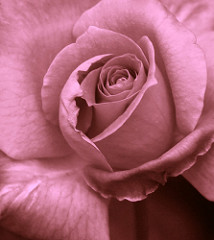

In [29]:
#if you want to see a image, use PIL lib

PIL.Image.open(str(roses[0]))

